## Cargar Datos

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from eda_functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el archivo CSV
file_path = '../data_extraction/boardgames_1000_juegos.csv'
df_juegos = pd.read_csv(file_path)

# Establecer el estilo de gráficos
sns.set(style="whitegrid")

In [4]:
df_juegos

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings,Mechanics,Categories
0,81305,Quarterback King,2010.0,Quarterback King is a board game which unites ...,2.0,2.0,90.0,90.0,7.50000,0.0,2,[],['Sports']
1,230726,Highway to Hell 2: Return to Flora (Savage Wor...,2017.0,From publisher blurb:&#10;&#10;Highway to Hell...,NaN,NaN,NaN,NaN,0.00000,0.0,0,[],[]
2,43420,Buffalo Bill Jr's Cattle Round-up Game,1956.0,Spin and move game with an ultra colorful game...,2.0,4.0,0.0,0.0,0.00000,0.0,0,['Roll / Spin and Move'],"['American West', 'Animals', ""Children's Game""..."
3,109024,Skate Crazy,NaN,User Summary&#10;&#10;You are Freddy and your ...,1.0,2.0,NaN,NaN,0.00000,0.0,0,[],[]
4,208284,Scratch Wars,2017.0,Game description from the publisher:&#10;&#10;...,2.0,8.0,7.0,30.0,6.16429,0.0,14,"['Deck, Bag, and Pool Building', 'Hand Managem...","['Card Game', 'Collectible Components', 'Fanta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84201,Rise of the Kasai,NaN,The story for the Rise of the Kasai takes plac...,1.0,1.0,NaN,NaN,9.00000,0.0,2,[],[]
996,204831,"Character Design: Warrior, Destroyer, Cavalry",2016.0,From the introduction:&#10;&#10;There are scor...,NaN,NaN,NaN,NaN,0.00000,0.0,0,[],[]
997,164047,Super Blue and Gray,2003.0,This game fuses the game Blue and Gray with ch...,2.0,2.0,0.0,0.0,0.00000,0.0,0,[],['Abstract Strategy']
998,177672,Hobbit Magazine (Issue 0 - 1990),NaN,La Casa del Hobbit presenta Hobbit Magazine&#1...,NaN,NaN,NaN,NaN,0.00000,0.0,0,[],[]


## Crear df para mecanicas y categorias

In [5]:
# Crear los DataFrames binarios para mecánicas y categorías
df_mecanicas = df_juegos[['BGGId','Mechanics']]
df_categorias = df_juegos[['BGGId','Categories']]


df_mecanicas = expandir_columnas_binarias(df_mecanicas, 'Mechanics')
df_categorias = expandir_columnas_binarias(df_categorias, 'Categories')

In [6]:
df_mecanicas

,BGGId,"""Prisoners Dilemma""",Acting,Action Drafting,Action Points,Action Queue,Action Timer,Action/Event,Area Majority / Influence,Area Movement,...,Trick-taking,Turn Order: Claim Action,Turn Order: Random,Turn Order: Stat-Based,Variable Phase Order,Variable Player Powers,Variable Set-up,Voting,Worker Placement,and Pool Building
0,81305,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,230726,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,109024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,208284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,204831,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,164047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,177672,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_categorias

,BGGId,"""Childrens Game""",Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American West,Ancient,Animals,...,Transportation,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
0,81305,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,230726,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43420,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,109024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,208284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,204831,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,164047,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,177672,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_juegos.drop(columns=['Mechanics', 'Categories'], inplace=True)

## Limpieza de datos

In [9]:
df_exploration(df_juegos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BGGId                    1000 non-null   int64  
 1   Name                     1000 non-null   object 
 2   Year_Published           771 non-null    float64
 3   Description              1000 non-null   object 
 4   Min_Players              577 non-null    float64
 5   Max_Players              577 non-null    float64
 6   Min_Playtime             407 non-null    float64
 7   Max_Playtime             407 non-null    float64
 8   Average_Rating           1000 non-null   float64
 9   Bayesian_Average_Rating  1000 non-null   float64
 10  Number_of_Ratings        1000 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 86.1+ KB
None

Valores duplicados: 0

Valores nulos: 
BGGId                        0
Name                         0
Year_Published        

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings
0,81305,Quarterback King,2010.0,Quarterback King is a board game which unites ...,2.0,2.0,90.0,90.0,7.50000,0.0,2
1,230726,Highway to Hell 2: Return to Flora (Savage Wor...,2017.0,From publisher blurb:&#10;&#10;Highway to Hell...,NaN,NaN,NaN,NaN,0.00000,0.0,0
2,43420,Buffalo Bill Jr's Cattle Round-up Game,1956.0,Spin and move game with an ultra colorful game...,2.0,4.0,0.0,0.0,0.00000,0.0,0
3,109024,Skate Crazy,NaN,User Summary&#10;&#10;You are Freddy and your ...,1.0,2.0,NaN,NaN,0.00000,0.0,0
4,208284,Scratch Wars,2017.0,Game description from the publisher:&#10;&#10;...,2.0,8.0,7.0,30.0,6.16429,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...
995,84201,Rise of the Kasai,NaN,The story for the Rise of the Kasai takes plac...,1.0,1.0,NaN,NaN,9.00000,0.0,2
996,204831,"Character Design: Warrior, Destroyer, Cavalry",2016.0,From the introduction:&#10;&#10;There are scor...,NaN,NaN,NaN,NaN,0.00000,0.0,0
997,164047,Super Blue and Gray,2003.0,This game fuses the game Blue and Gray with ch...,2.0,2.0,0.0,0.0,0.00000,0.0,0
998,177672,Hobbit Magazine (Issue 0 - 1990),NaN,La Casa del Hobbit presenta Hobbit Magazine&#1...,NaN,NaN,NaN,NaN,0.00000,0.0,0


In [10]:
df_juegos_clean = df_juegos.dropna()

In [11]:
df_exploration(df_juegos_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BGGId                    407 non-null    int64  
 1   Name                     407 non-null    object 
 2   Year_Published           407 non-null    float64
 3   Description              407 non-null    object 
 4   Min_Players              407 non-null    float64
 5   Max_Players              407 non-null    float64
 6   Min_Playtime             407 non-null    float64
 7   Max_Playtime             407 non-null    float64
 8   Average_Rating           407 non-null    float64
 9   Bayesian_Average_Rating  407 non-null    float64
 10  Number_of_Ratings        407 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 38.2+ KB
None

Valores duplicados: 0

Valores nulos: 
BGGId                      0
Name                       0
Year_Published             

,BGGId,Name,Year_Published,Description,Min_Players,Max_Players,Min_Playtime,Max_Playtime,Average_Rating,Bayesian_Average_Rating,Number_of_Ratings
0,81305,Quarterback King,2010.0,Quarterback King is a board game which unites ...,2.0,2.0,90.0,90.0,7.50000,0.0,2
2,43420,Buffalo Bill Jr's Cattle Round-up Game,1956.0,Spin and move game with an ultra colorful game...,2.0,4.0,0.0,0.0,0.00000,0.0,0
4,208284,Scratch Wars,2017.0,Game description from the publisher:&#10;&#10;...,2.0,8.0,7.0,30.0,6.16429,0.0,14
6,42701,Beleaguered Castle,0.0,Beleagued Castle is a solitaire card game play...,1.0,1.0,15.0,15.0,4.27083,0.0,12
9,31672,Photo Trivia: Potpourri Game,1984.0,Object: Players try to win each card by lookin...,2.0,10.0,10.0,10.0,5.50000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
990,266358,Fire! Fire! Scouts to the Rescue!,2013.0,"The game entitled ""Fire! Fire! Scouts to the R...",2.0,4.0,0.0,0.0,6.00000,0.0,1
991,146928,Doctor Who DVD Board Game,2013.0,Doctor Who Trivia Game with DVD similar to Sce...,2.0,4.0,60.0,60.0,5.82864,0.0,27
994,111261,Zirkus Zahlo Ranni,0.0,"Every player gets his own arena with 12 holes,...",1.0,4.0,20.0,20.0,5.66667,0.0,3
997,164047,Super Blue and Gray,2003.0,This game fuses the game Blue and Gray with ch...,2.0,2.0,0.0,0.0,0.00000,0.0,0


In [12]:
# Cambiar a int las columnas Year_Published, Min_Players, Max_Players
df_juegos_clean = df_juegos_clean.astype({'Year_Published': 'int', 'Min_Players': 'int', 'Max_Players': 'int'})

## EDA

### Análisis Univariable

#### Análisis Name

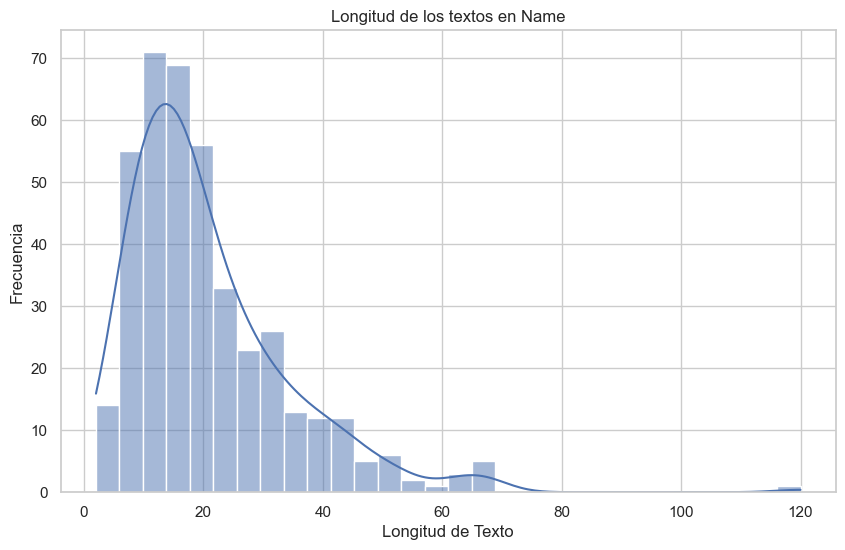

Descripción estadística de la longitud de los textos en Name:
count    407.000000
mean      20.803440
std       13.847362
min        2.000000
25%       11.000000
50%       17.000000
75%       26.000000
max      120.000000
Name: Name_longitud, dtype: float64



In [13]:
analizar_variable_textual(df_juegos_clean, 'Name')

#### Análisis Description

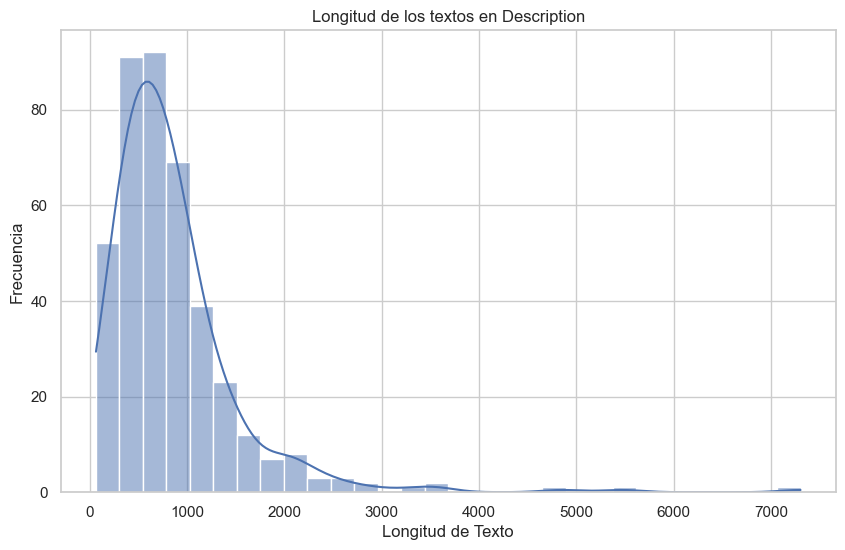

Descripción estadística de la longitud de los textos en Description:
count     407.000000
mean      849.614251
std       704.731194
min        63.000000
25%       449.500000
50%       693.000000
75%      1033.500000
max      7304.000000
Name: Description_longitud, dtype: float64



In [14]:
analizar_variable_textual(df_juegos_clean, 'Description')

#### Análisis Year_Published

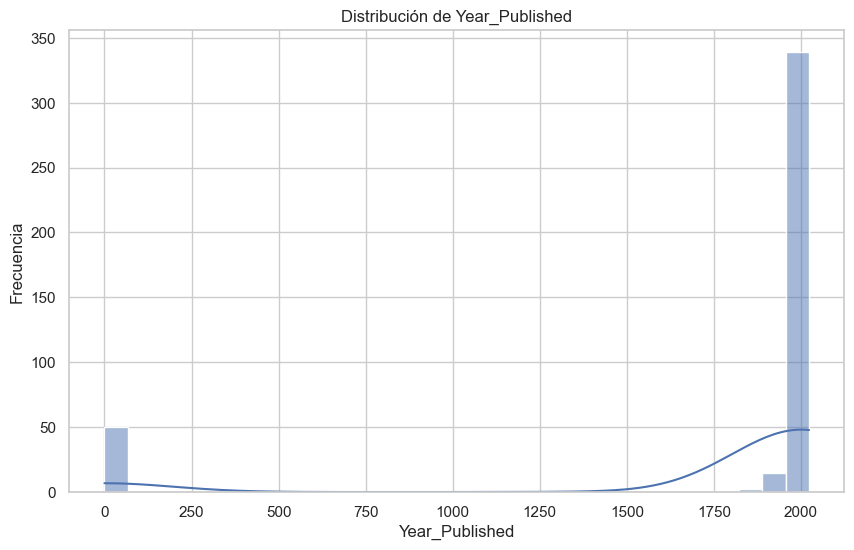

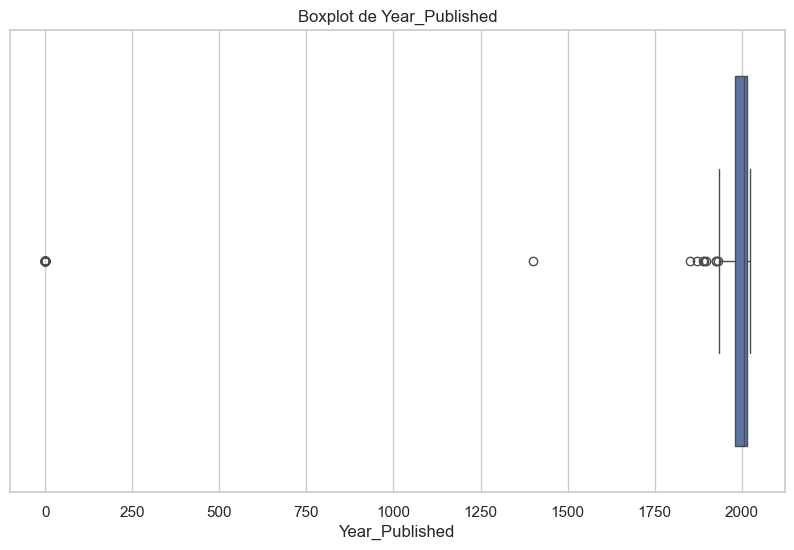

Descripción estadística de Year_Published:
count     407.000000
mean     1753.174447
std       657.951453
min         0.000000
25%      1981.000000
50%      2006.000000
75%      2014.000000
max      2023.000000
Name: Year_Published, dtype: float64



In [15]:
analizar_variable_numerica(df_juegos_clean, 'Year_Published')

Podemos observar que hay errores en los datos de año de publicación. Volvemos a analizarlo, teniendo en cuenta los datos a partir de 1900.

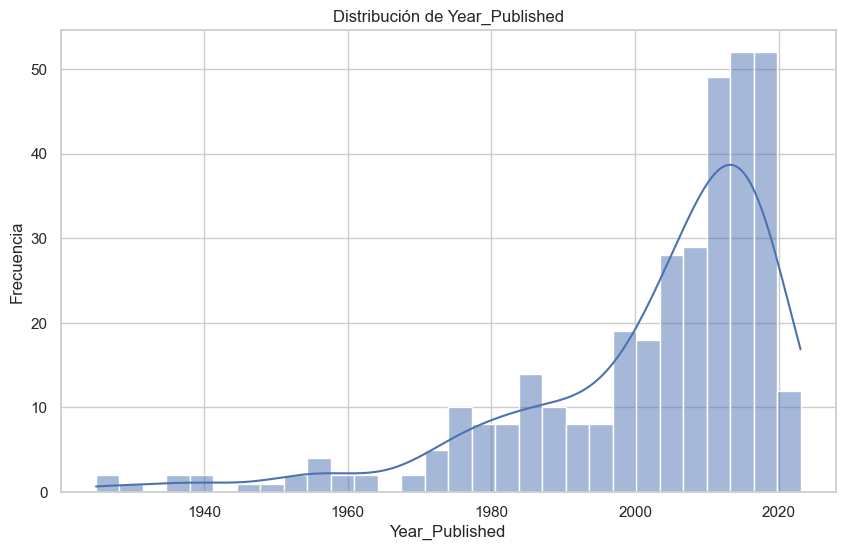

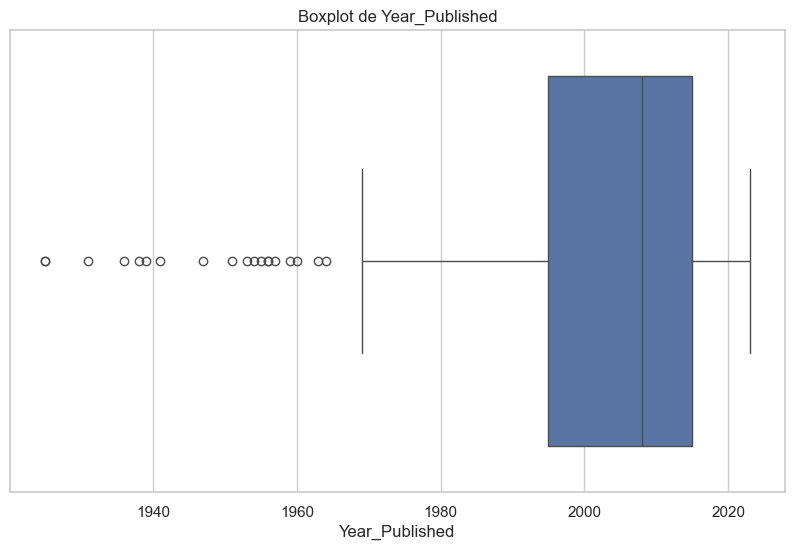

Descripción estadística de Year_Published:
count     351.000000
mean     2002.105413
std        18.412348
min      1925.000000
25%      1995.000000
50%      2008.000000
75%      2015.000000
max      2023.000000
Name: Year_Published, dtype: float64



In [16]:
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Year_Published'] > 1900], 'Year_Published')

c:\Users\Laura Ortiz\Documents\GitHub\GameMatcher\eda\eda_functions.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Published'] = pd.to_numeric(df['Year_Published'], errors='coerce')


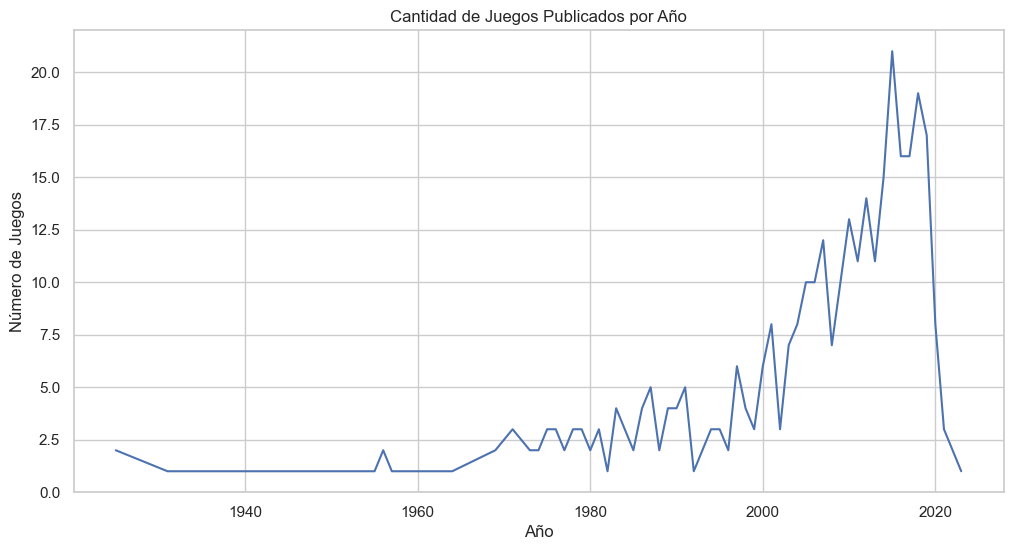

In [17]:
#Juegos publicados por año
analizar_juegos_por_año(df_juegos_clean[df_juegos_clean['Year_Published'] > 1900])

#### Análisis Min_Players

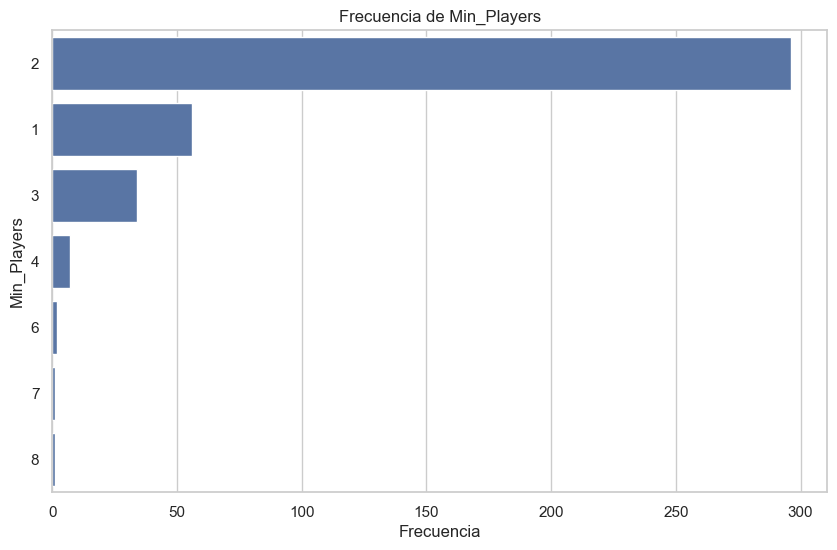

Frecuencia de Min_Players:
2    296
1     56
3     34
4      7
6      2
7      1
8      1
Name: Min_Players, dtype: int64



In [18]:
analizar_variable_categorica(df_juegos_clean[df_juegos_clean['Min_Players'] > 0], 'Min_Players')

#### Análisis Max_Players

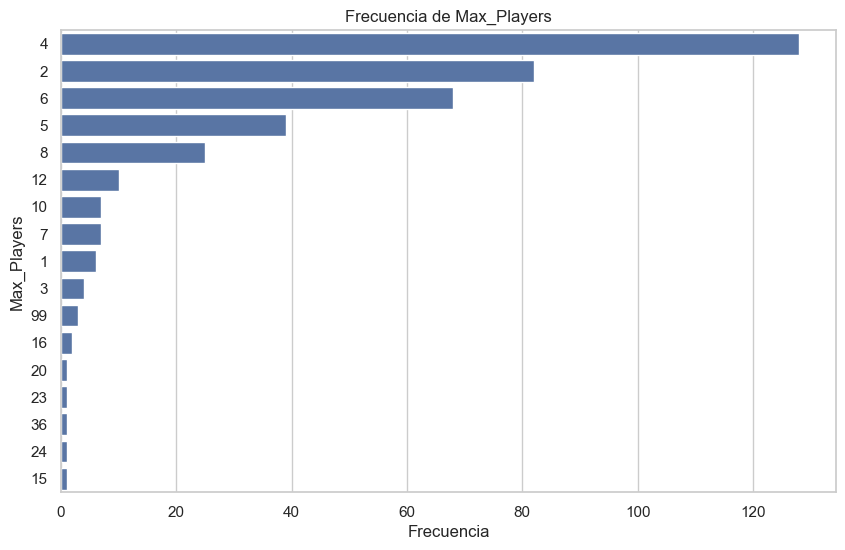

Frecuencia de Max_Players:
4     128
2      82
6      68
5      39
8      25
12     10
10      7
7       7
1       6
3       4
99      3
16      2
20      1
23      1
36      1
24      1
15      1
Name: Max_Players, dtype: int64



In [19]:
analizar_variable_categorica(df_juegos_clean[df_juegos_clean['Max_Players'] > 0], 'Max_Players')

#### Análisis Min_Playtime

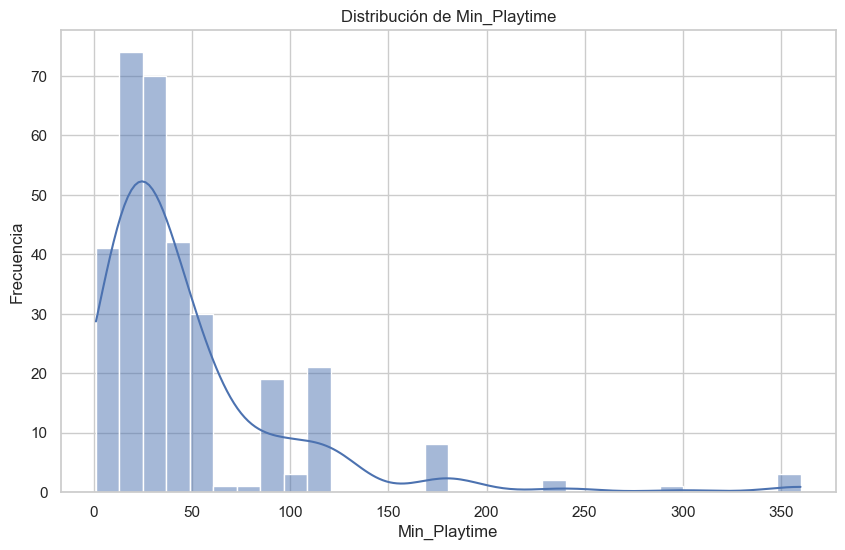

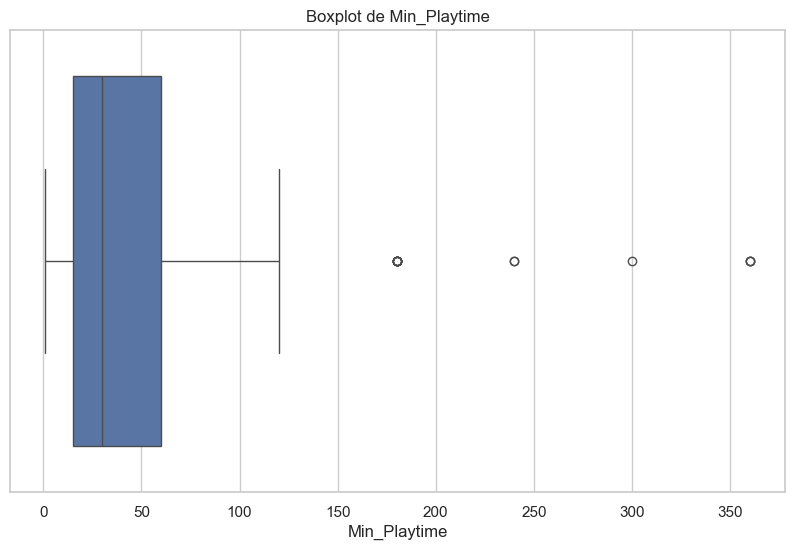

Descripción estadística de Min_Playtime:
count    316.000000
mean      48.547468
std       52.963788
min        1.000000
25%       15.000000
50%       30.000000
75%       60.000000
max      360.000000
Name: Min_Playtime, dtype: float64



In [20]:
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Min_Playtime'] > 0], 'Min_Playtime')

#### Análisis Max_Playtime

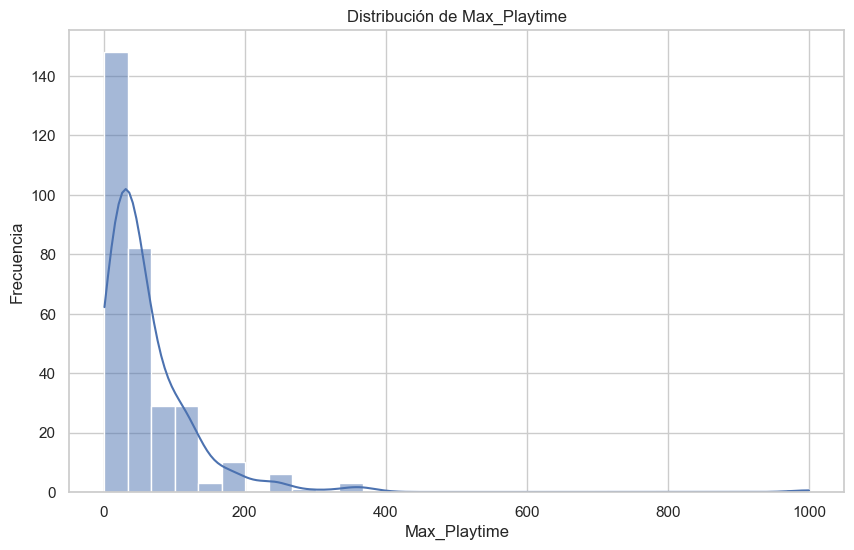

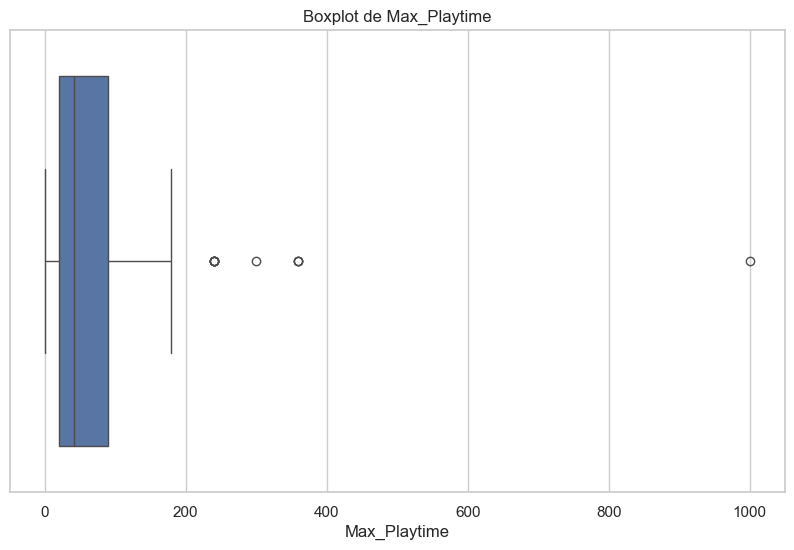

Descripción estadística de Max_Playtime:
count     312.000000
mean       62.657051
std        79.123216
min         1.000000
25%        20.000000
50%        42.500000
75%        90.000000
max      1000.000000
Name: Max_Playtime, dtype: float64



In [21]:
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Max_Playtime'] > 0], 'Max_Playtime')

#### Distribución de las valoraciones (Bayesian_Average_Rating y Average_Rating)

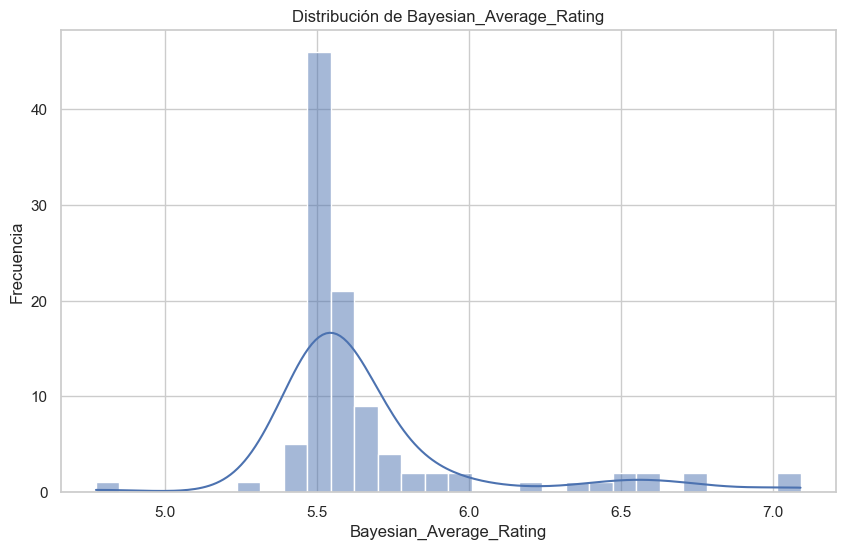

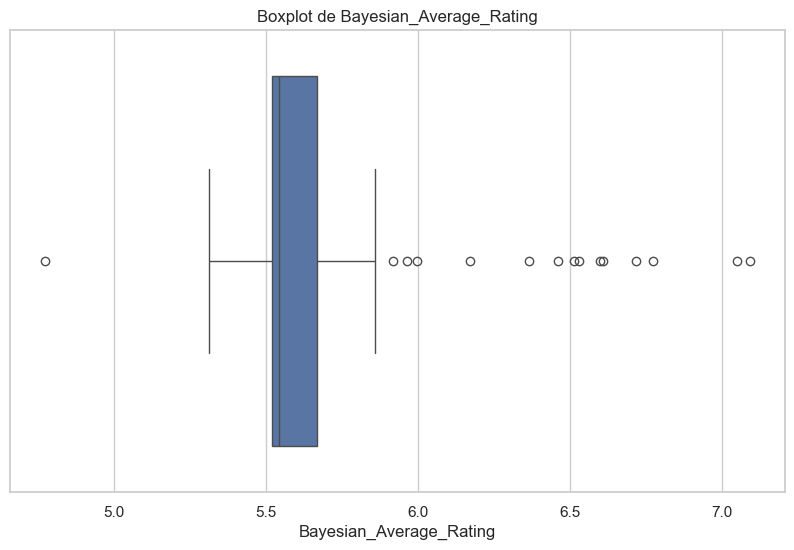

Descripción estadística de Bayesian_Average_Rating:
count    104.000000
mean       5.677831
std        0.363893
min        4.773930
25%        5.518565
50%        5.542135
75%        5.666867
max        7.091870
Name: Bayesian_Average_Rating, dtype: float64



In [22]:
# Distribución de las valoraciones (Bayesian_Average_Rating)
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Bayesian_Average_Rating'] > 0], 'Bayesian_Average_Rating')

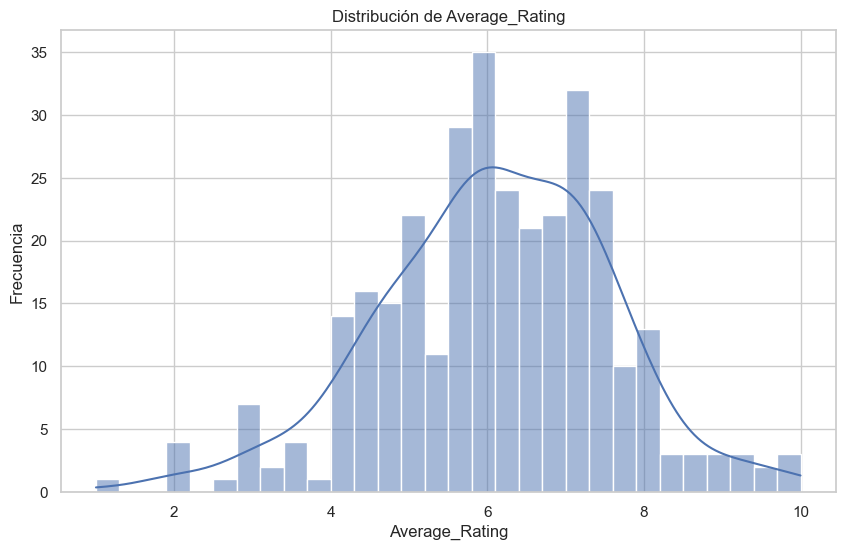

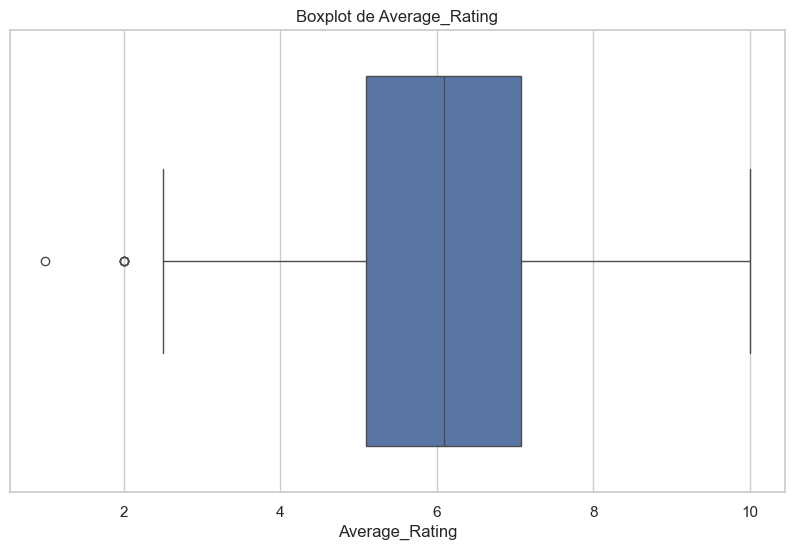

Descripción estadística de Average_Rating:
count    325.000000
mean       6.087248
std        1.484524
min        1.000000
25%        5.100000
50%        6.100000
75%        7.081790
max       10.000000
Name: Average_Rating, dtype: float64



In [23]:
# Distribución de las valoraciones (Average_Rating)
analizar_variable_numerica(df_juegos_clean[df_juegos_clean['Average_Rating'] > 0], 'Average_Rating')

#### Analizar mecánicas y categorías populares

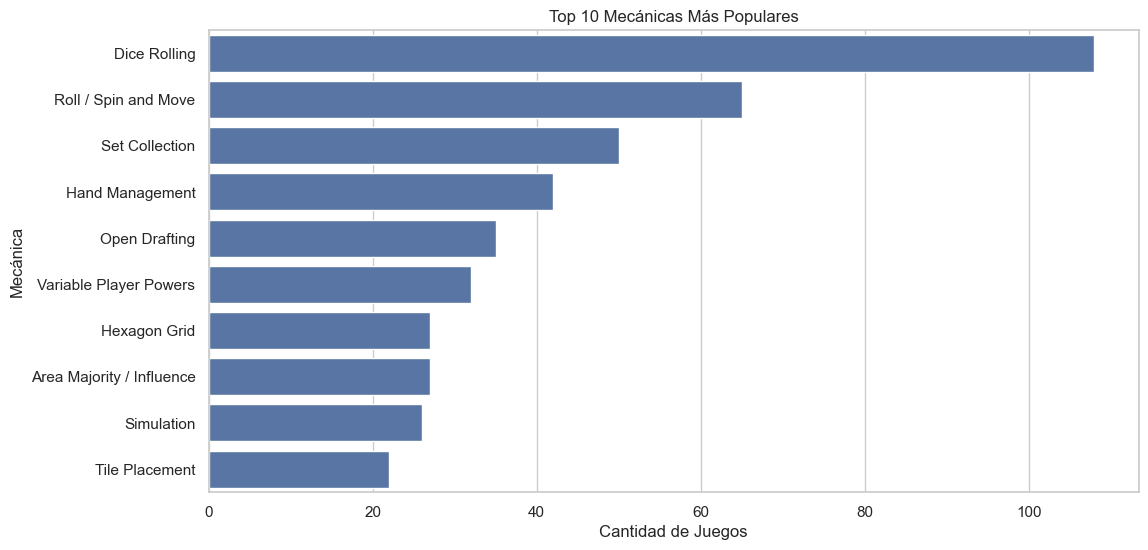

In [24]:
# Mecánicas y categorías populares
analizar_mecanicas_populares(df_mecanicas)

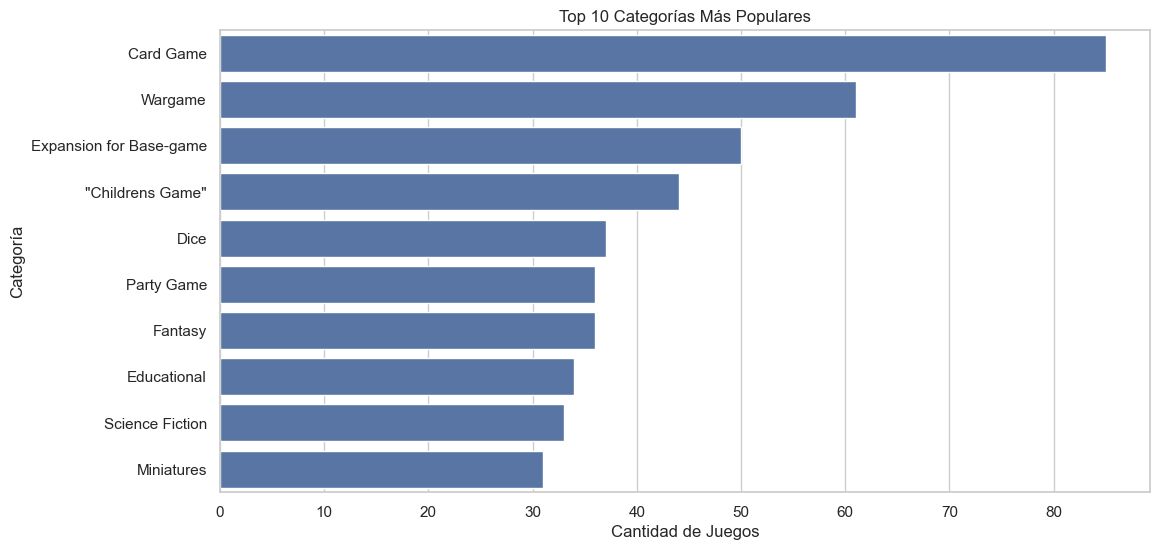

In [25]:
analizar_categorias_populares(df_categorias)

### Análisis multivariante

#### Analizar la correlación entre valoraciones y otras variables

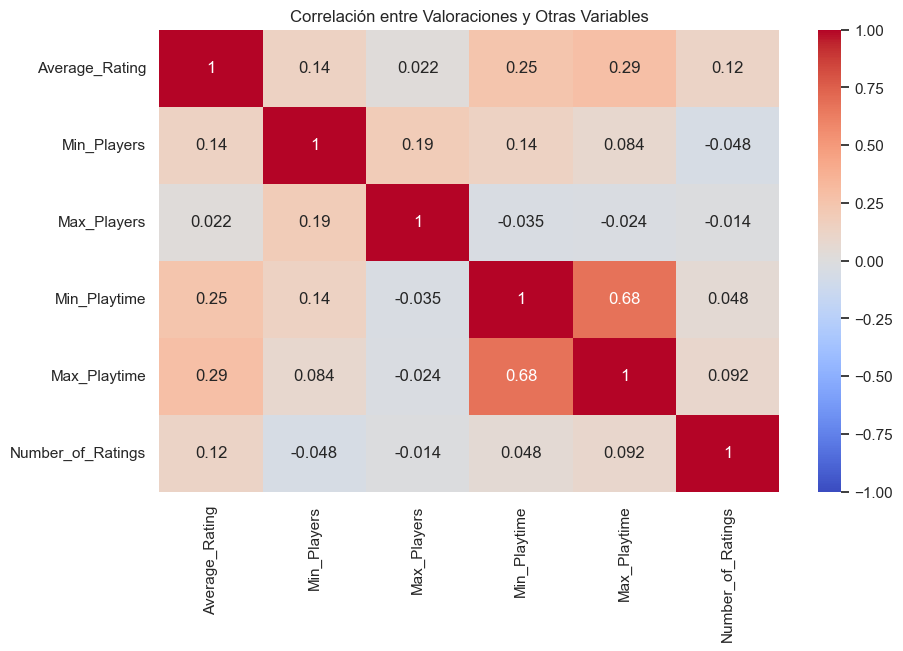

In [26]:
# Correlación entre valoraciones y otras variables
analizar_correlaciones(df_juegos_clean)

#### Analizar las mecánicas y categorías mejor valoradas

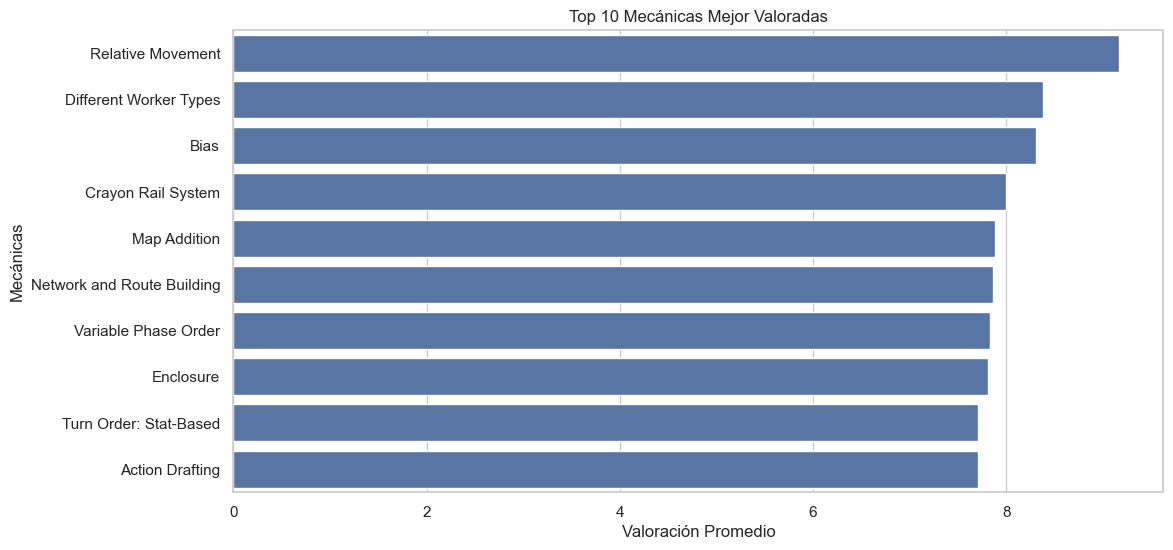

Top 10 Mecánicas Mejor Valoradas:
Relative Movement             9.166670
Different Worker Types        8.381220
Bias                          8.307110
Crayon Rail System            8.000000
Map Addition                  7.878520
Network and Route Building    7.858126
Variable Phase Order          7.833970
Enclosure                     7.810640
Turn Order: Stat-Based        7.703280
Action Drafting               7.703280
dtype: float64



In [27]:
# Mecánicas mejor valoradas
analizar_mejor_valoradas(df_juegos_clean, df_mecanicas, 'mecánicas')

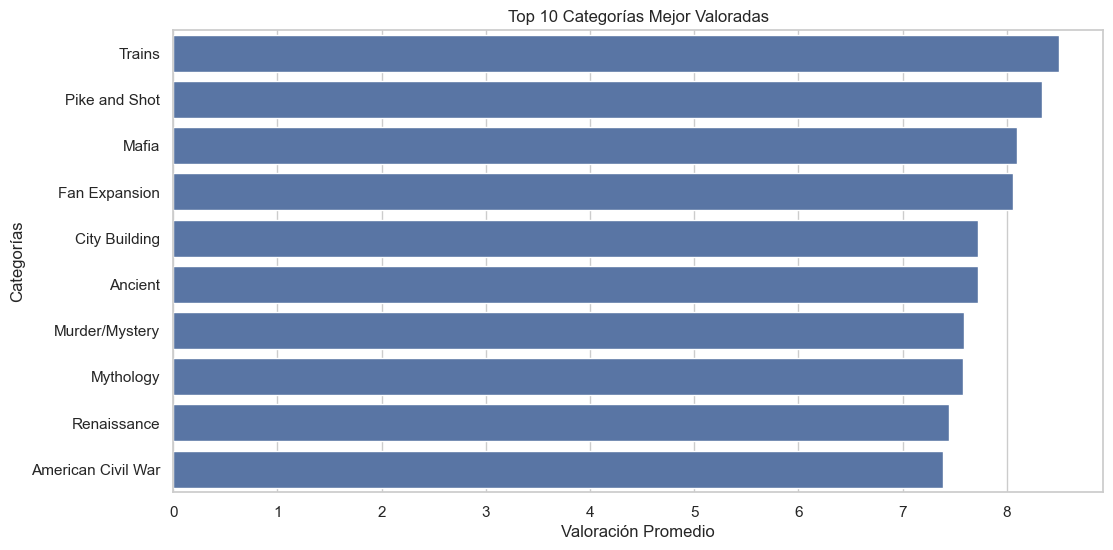

Top 10 Categorías Mejor Valoradas:
Trains                8.500000
Pike and Shot         8.333330
Mafia                 8.097915
Fan Expansion         8.058820
City Building         7.722757
Ancient               7.719278
Murder/Mystery        7.586903
Mythology             7.582628
Renaissance           7.444443
American Civil War    7.387780
dtype: float64



In [28]:
# Categorias mejor valoradas
analizar_mejor_valoradas(df_juegos_clean, df_categorias, 'categorías')

#### Analizar la correlación entre categorias

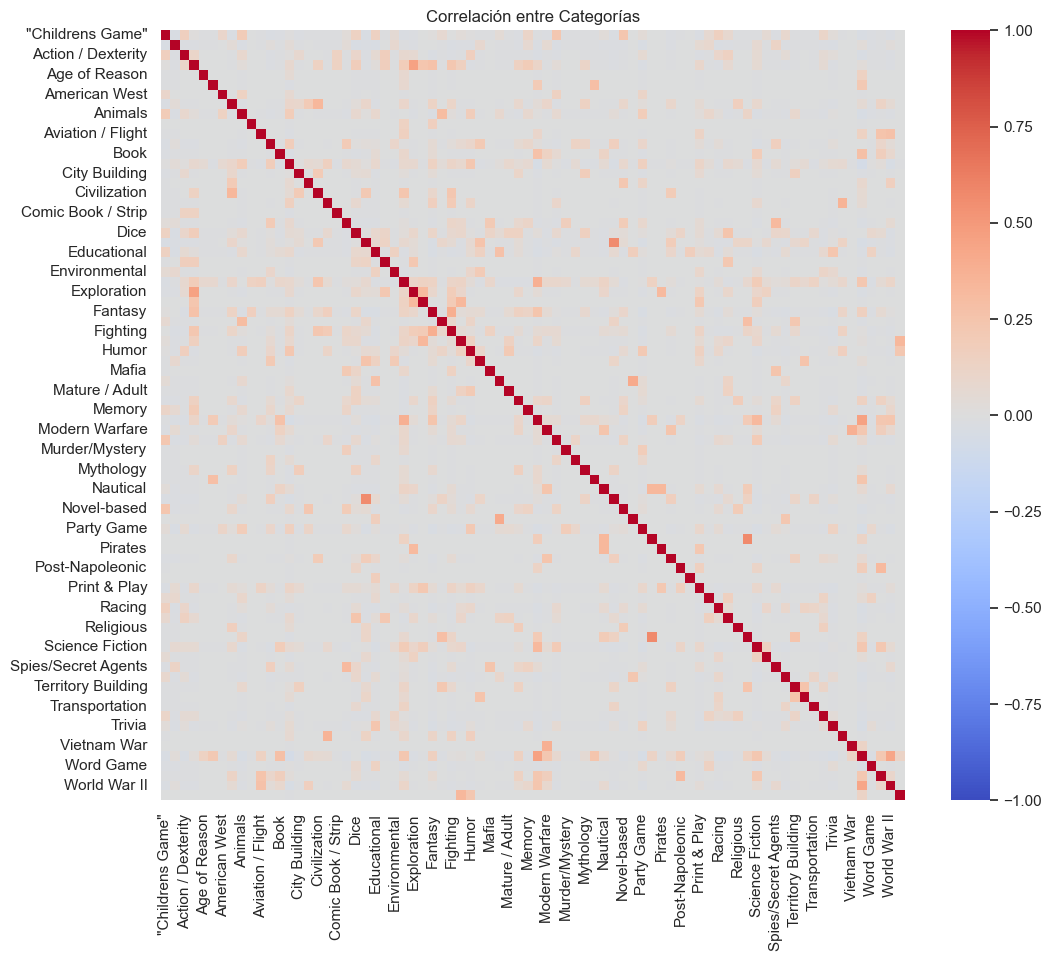

In [29]:
correlacion_entre_categorias(df_categorias)


#### Analizar la correlación entre mecanicas

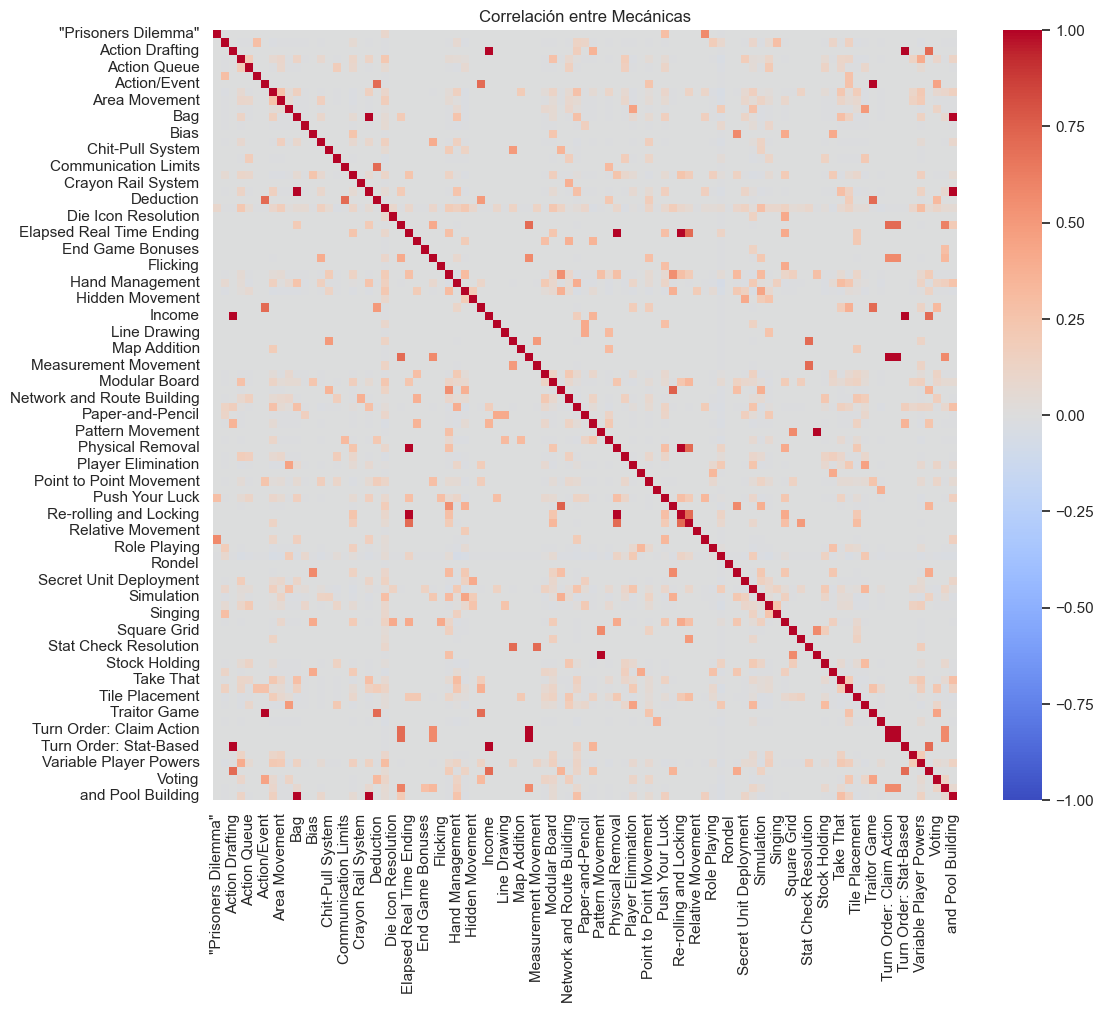

In [30]:
correlacion_entre_mecanicas(df_mecanicas)


In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

# Preparar los datos para Apriori, añadiendo sufijos a las columnas duplicadas
df_combined = df_mecanicas.drop(columns=['BGGId']).join(
    df_categorias.drop(columns=['BGGId']),
    lsuffix='_mec', rsuffix='_cat'
)

# Asegurarse de que todas las columnas solo tengan valores binarios (0 o 1)
df_combined = df_combined.applymap(lambda x: 1 if x > 0 else 0)

# Aplicar el algoritmo Apriori
frequent_itemsets = apriori(df_combined, min_support=0.05, use_colnames=True)

# Generar las reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Mostrar las reglas de asociación más fuertes
rules.head()


c:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
